In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

**Read and Understand Data**



In [3]:
df = pd.read_csv('/content/sample_data/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Check info about Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


Display the statistics of dataset

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Exploratory Data Analysis**

In [17]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [18]:
(df['Churn'].value_counts(normalize=True) * 100)

# 26.53 % of customers switched to another firm.

,proportion
Churn,
No,73.463013
Yes,26.536987


Check for Null Values

In [6]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [11]:
(df.isnull().sum() / len(df)) * 100

#Only internet service showing more than 50% missing values

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.099389
Partner,0.000000
Dependents,0.000000
tenure,0.184580
PhoneService,0.184580
MultipleLines,0.184580
InternetService,0.525344
OnlineSecurity,0.212977


In [12]:
#split into numerical and categorical columns

col_num = df.select_dtypes(include=['int32','int64','float64'])
col_cat = df.select_dtypes(include=['object'])

In [13]:
col_num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [14]:
col_cat.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

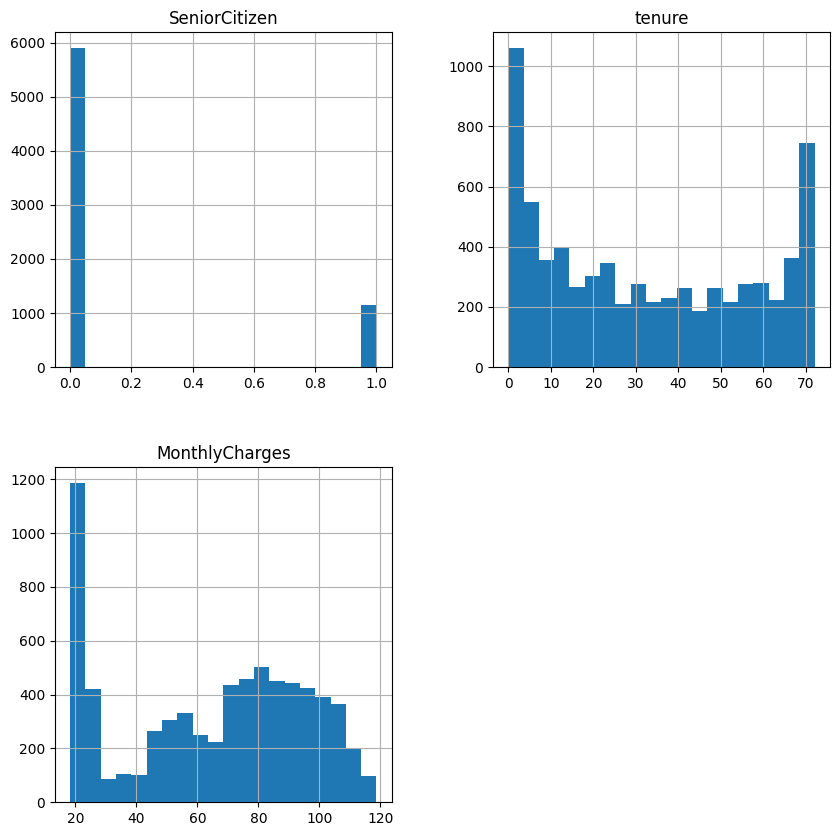

In [16]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


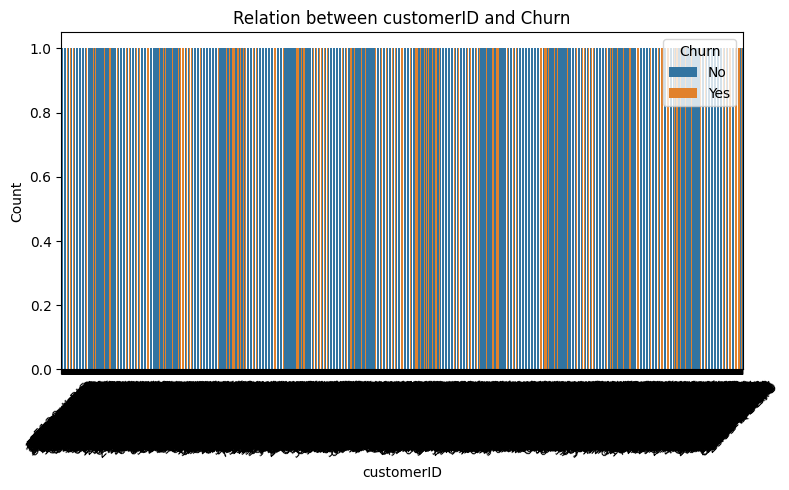

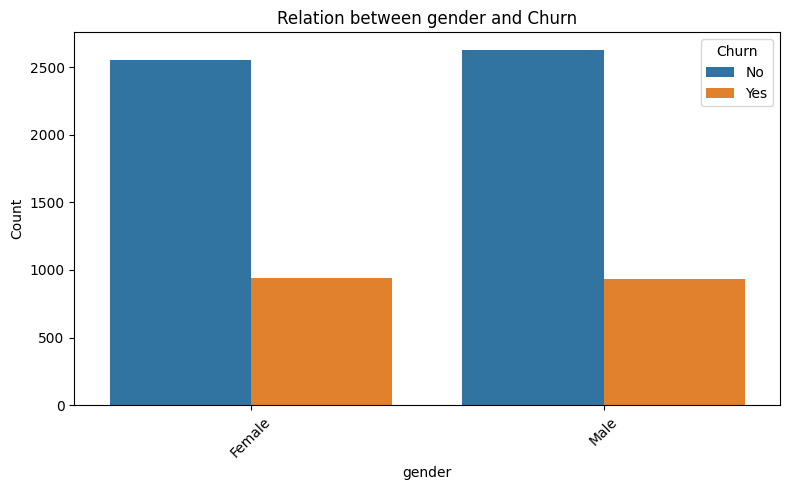

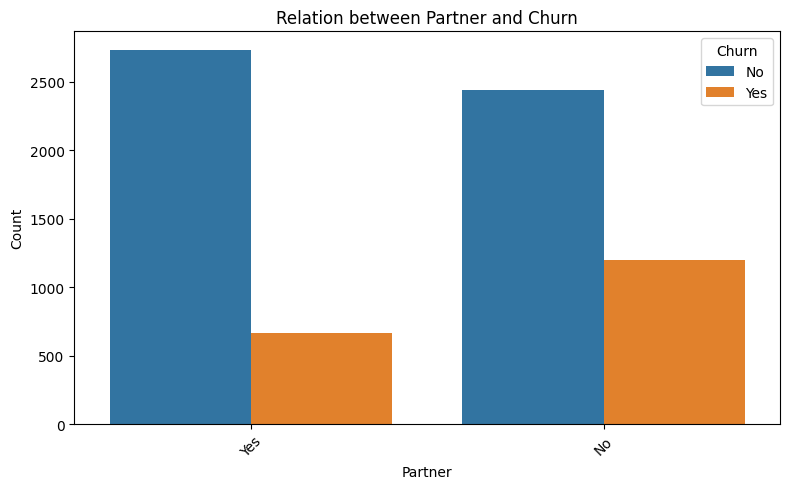

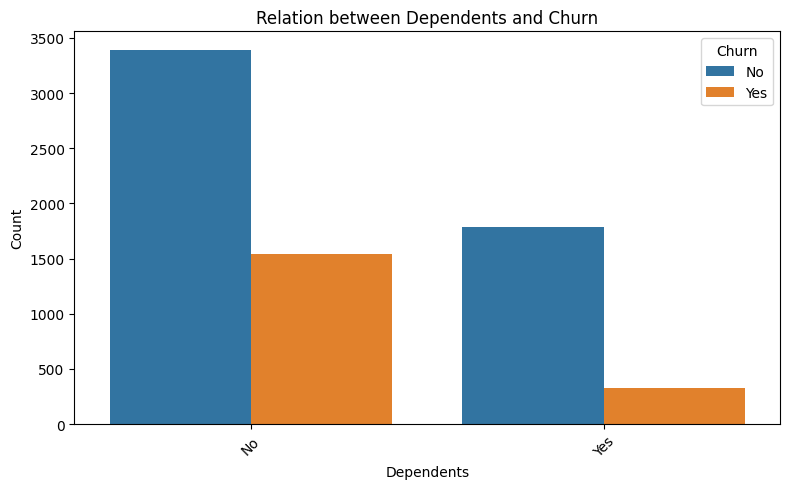

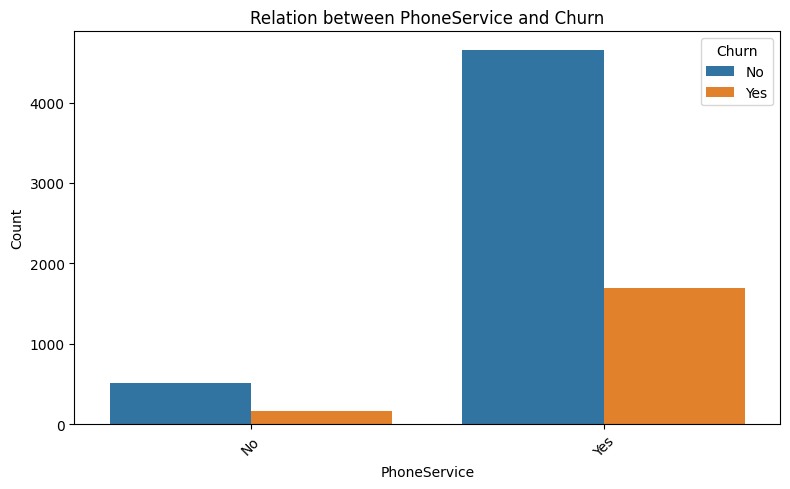

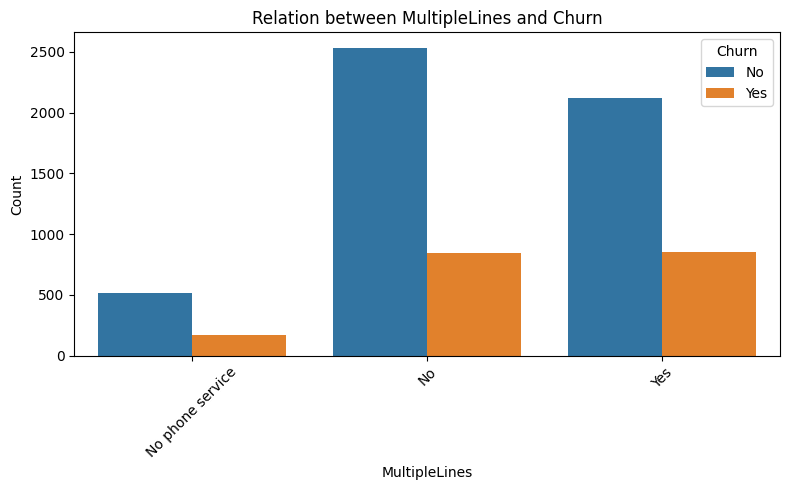

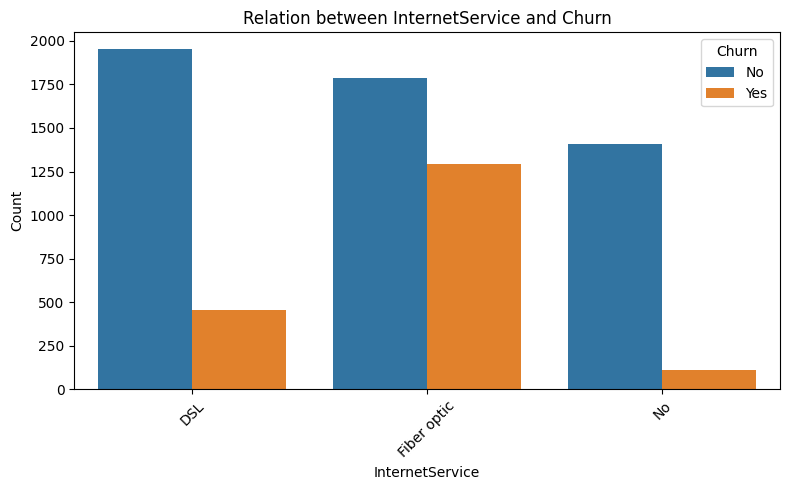

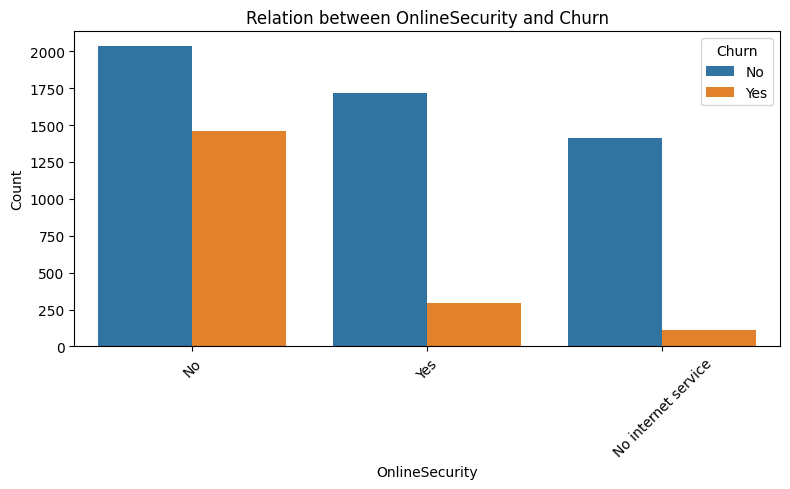

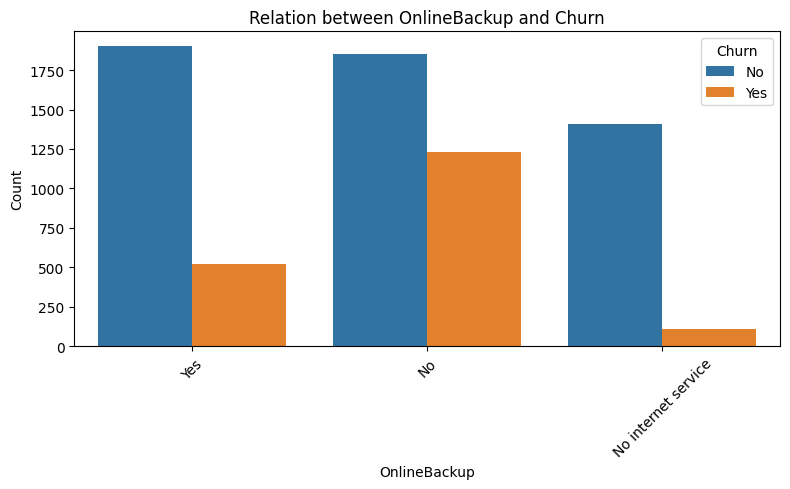

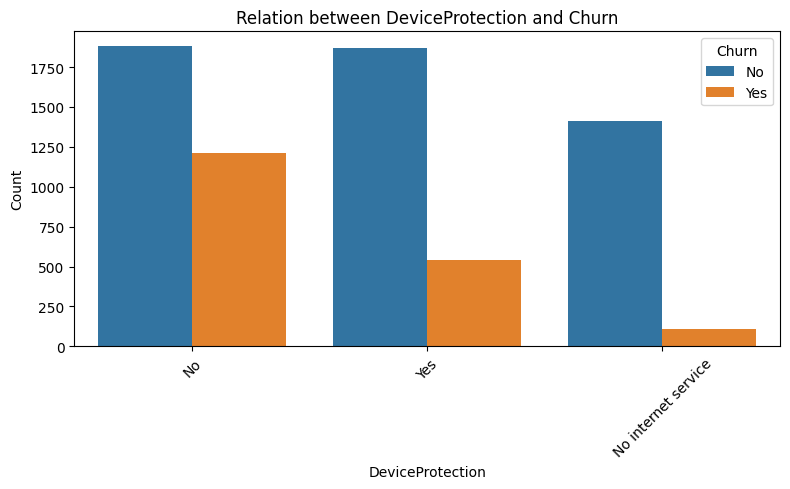

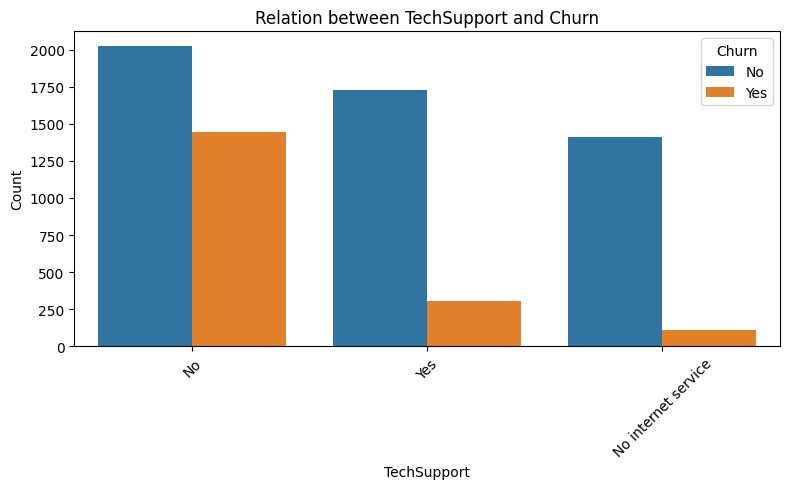

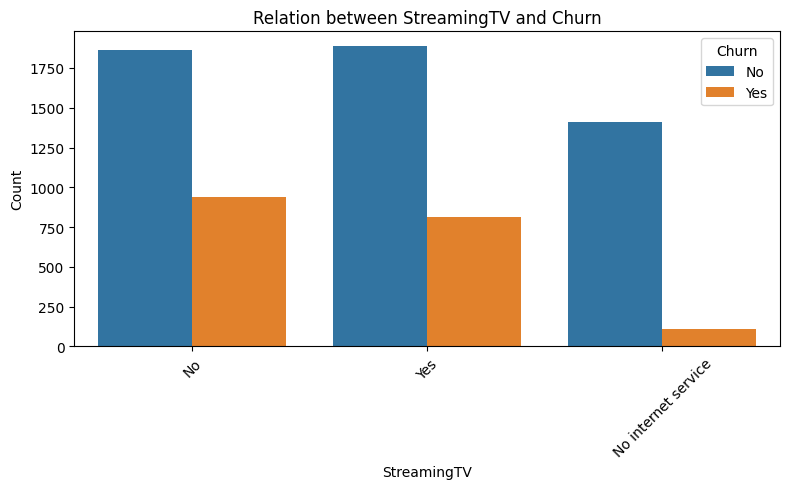

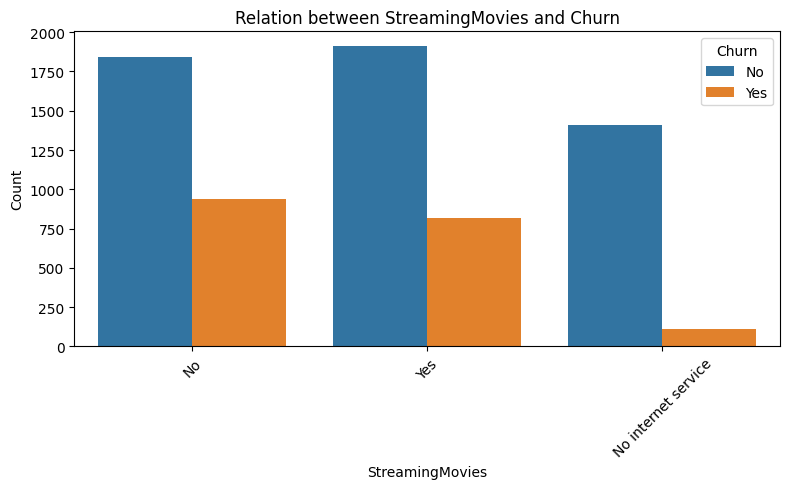

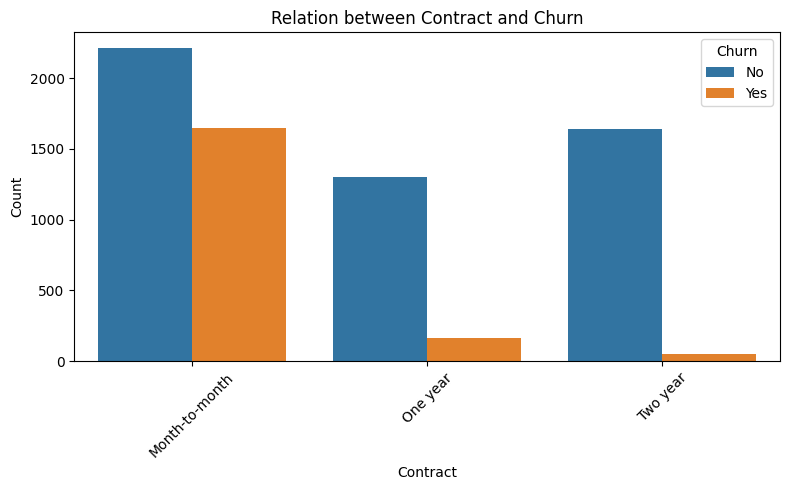

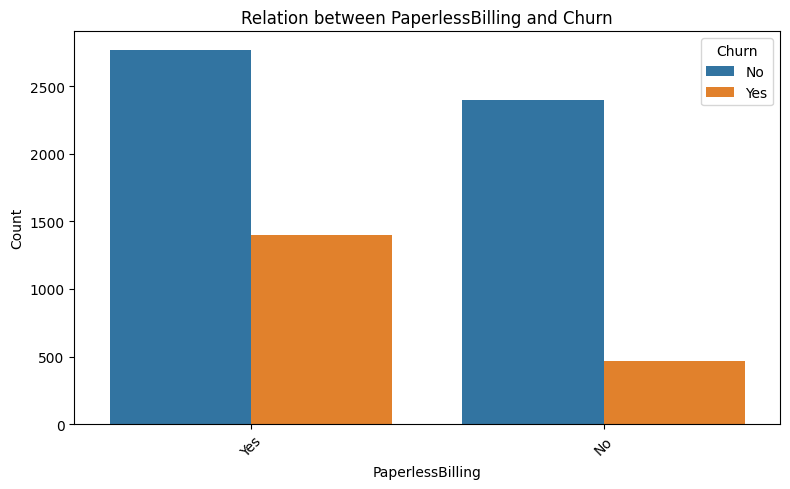

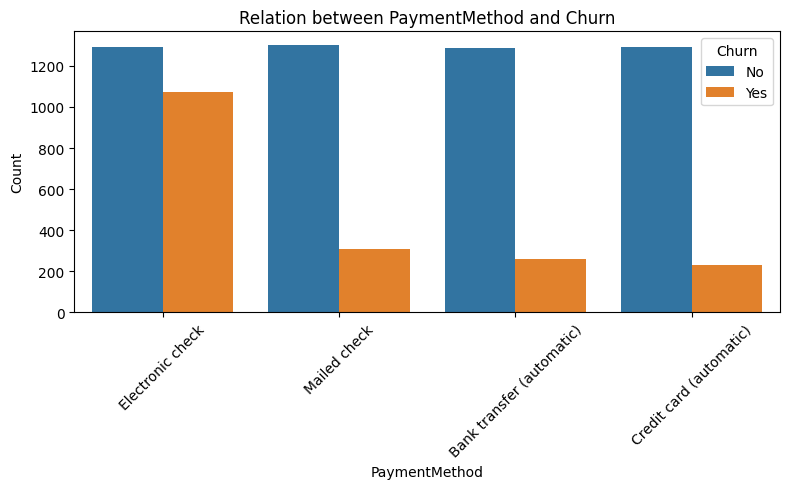

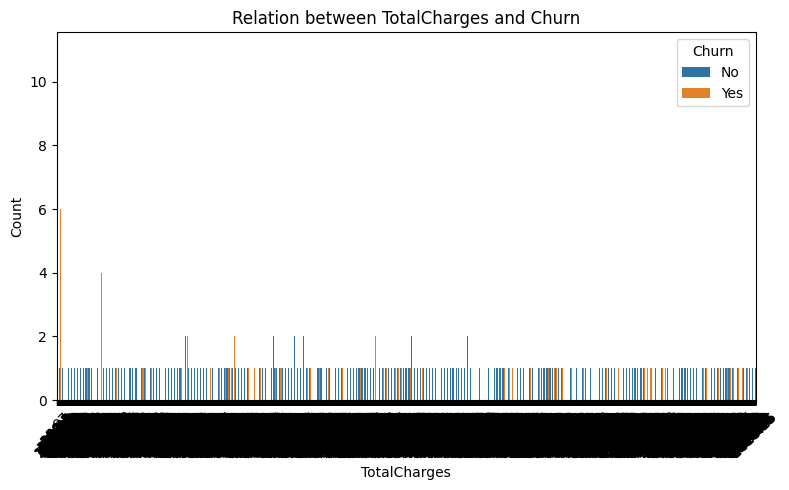

In [19]:
# Plot each categorical column against 'Churn'

for column in col_cat:
    if column != 'Churn':
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=column, hue='Churn')
        plt.title(f'Relation between {column} and Churn')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

<ipython-input-21-9321107cf963>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
<ipython-input-21-9321107cf963>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],


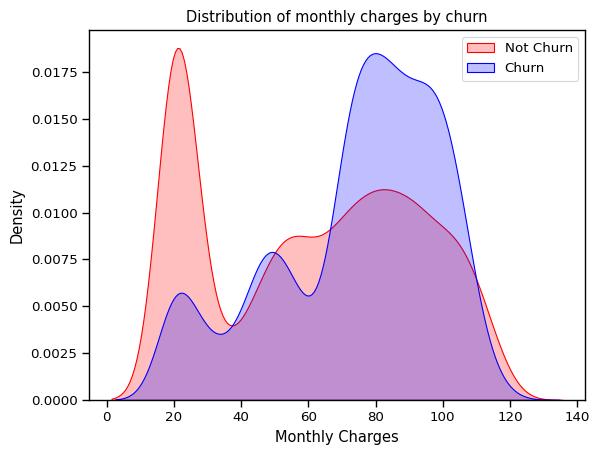

In [21]:
# Distribution of monthly Charges
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

**Summary of Visualizations**
- Male and Female categories are almost equal - Customers are 49.5 % female and 50.5 % male.
- About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract
- Major customers who moved out were having Electronic Check as Payment Method. Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less to move out.
- Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.
-Customers without dependents are more chance to churn
- Customers that doesn't have partners are more likely to churn
- Most of the senior citizens churn.
- Those who dnt have online security will churn
- Customers with Paperless Billing are high chance to churn
- Customers with ut TechSupport are mostly churn
- Customers with higher Monthly Charges will move
- New customers are likely to move out

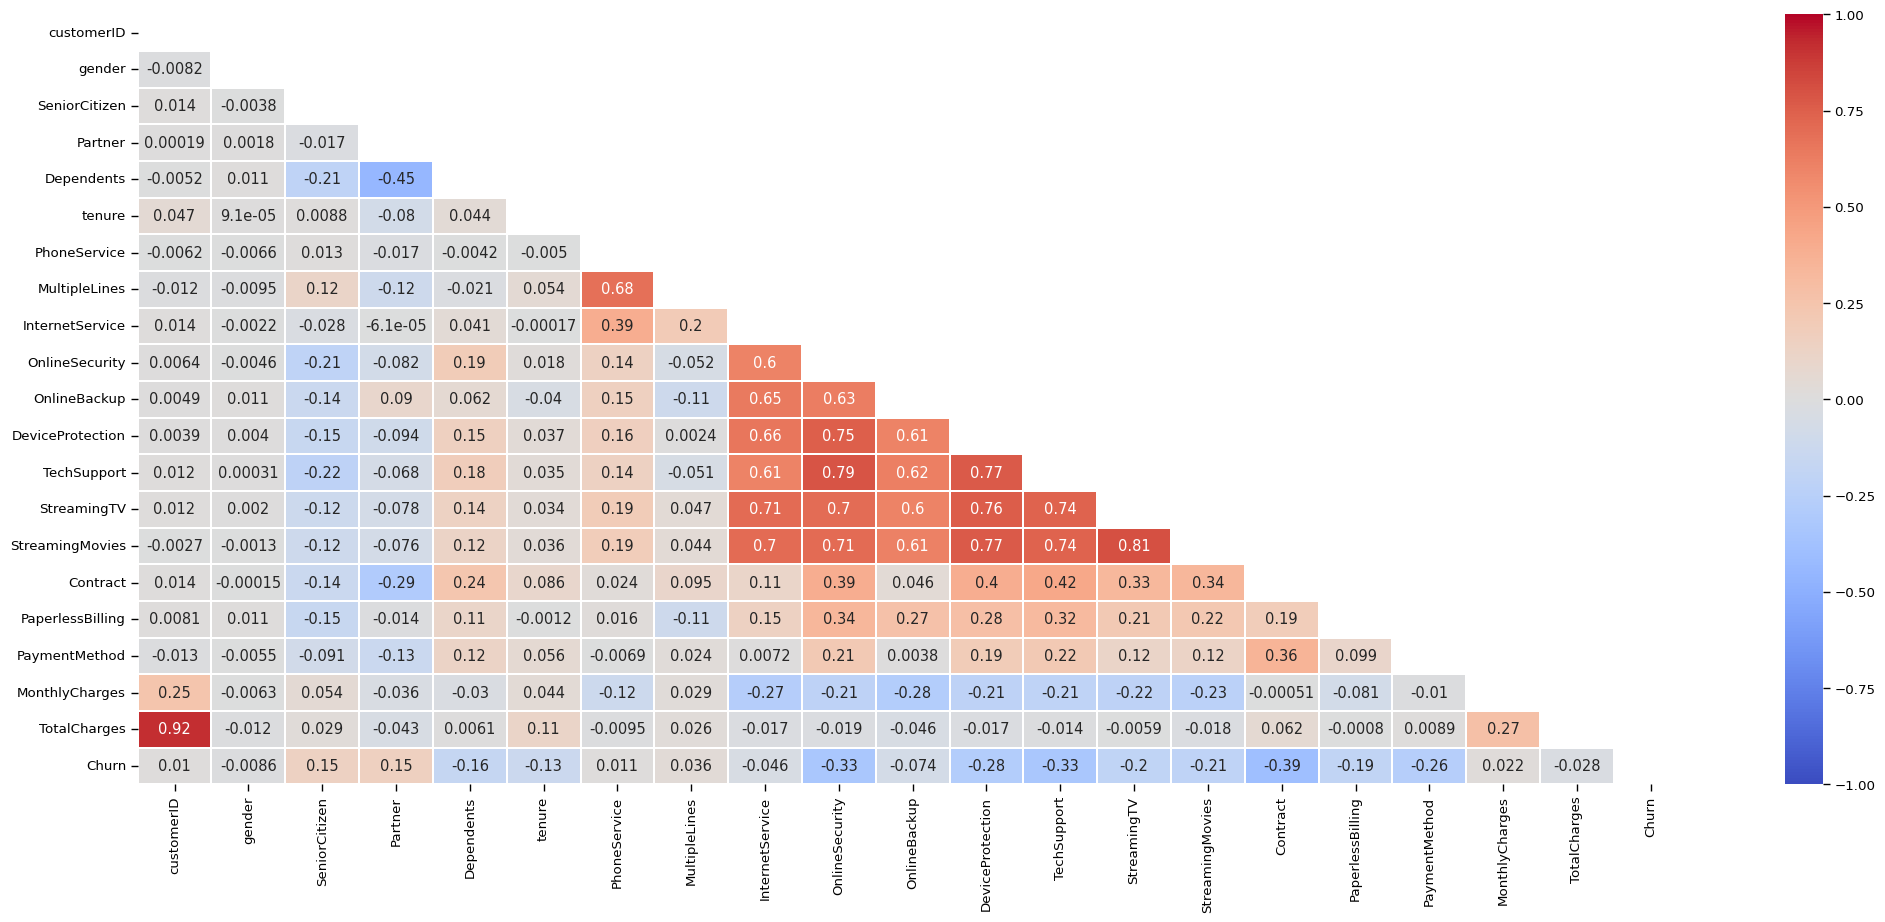

In [25]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

**Data Preprcessing**

In [27]:
# Handling missing values of numerical column

col_num = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
df[col_num] = df[col_num].apply(lambda x: x.fillna(x.median()))
df[col_num].isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0


In [29]:
cat_missing = [col for col in col_cat if df[col].isnull().sum() > 0]
cat_missing

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [30]:
# Handling missing values of categorical column
df[cat_missing] = df[cat_missing].apply(lambda x: x.fillna(x.mode()[0]))

In [31]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [32]:
# Check for duplicates
df.duplicated().sum()

0

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df['customerID'].nunique()

7043

In [36]:
# define y and X
x = df.drop(['customerID','Churn'],axis=1)
y = df['Churn']

In [37]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [41]:
#Balancing data
ros = RandomOverSampler()

In [43]:
x,y = ros.fit_resample(x,y)

In [44]:
y.value_counts()

,count
Churn,
No,5174
Yes,5174


In [47]:
# Label Encoding of Target column

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [48]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [50]:
# Encoding of Categorical columns
oe = OrdinalEncoder()


In [51]:
x = oe.fit_transform(x)

In [53]:
scaler= StandardScaler()

x = scaler.fit_transform(x)

**Splitting Data for Modelling**

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

Logistic Regression

In [60]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7719366061074604


In [65]:
lr_pred= lr_model.predict(x_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1298
           1       0.75      0.80      0.78      1289

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587



KNN Classifier

In [66]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7614998067259374


In [67]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1298
           1       0.72      0.84      0.78      1289

    accuracy                           0.76      2587
   macro avg       0.77      0.76      0.76      2587
weighted avg       0.77      0.76      0.76      2587



SVM

In [68]:
svm_model = SVC(random_state = 1)
svm_model.fit(x_train,y_train)
predict_y = svm_model.predict(x_test)
accuracy_svm = svm_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svm)

SVM accuracy is : 0.7955160417471975


In [69]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1298
           1       0.77      0.83      0.80      1289

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



Random Forest

In [80]:
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(x_train, y_train)

prediction_test = model_rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))
print (metrics.f1_score(y_test, prediction_test))

0.8964051024352532
0.9008142116950407


In [71]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1298
           1       0.87      0.94      0.90      1289

    accuracy                           0.90      2587
   macro avg       0.90      0.90      0.90      2587
weighted avg       0.90      0.90      0.90      2587



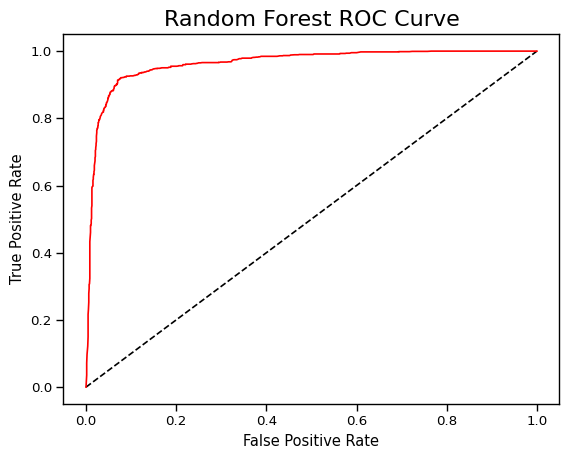

In [72]:
y_rfpred_prob = model_rf.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Decision Tree classifier

In [76]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
predictdt_y = dt_model.predict(x_test)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8732122149207576


In [77]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1298
           1       0.83      0.94      0.88      1289

    accuracy                           0.87      2587
   macro avg       0.88      0.87      0.87      2587
weighted avg       0.88      0.87      0.87      2587



Gradient Boost Classifier

In [78]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7955160417471975


In [79]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1298
           1       0.77      0.84      0.80      1289

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



**Conclusion**
Random forest classifier giving highest accuracy score of 0.89 and F1 Score of 0.9